In [42]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

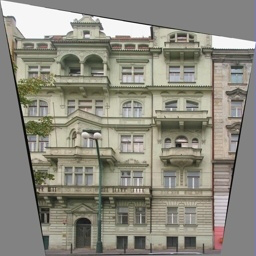

In [22]:
im = Image.open('datasets/facades/train/A/100_A.jpg')
im

In [23]:
x = np.array(im)/256.0
x.shape

(256, 256, 3)

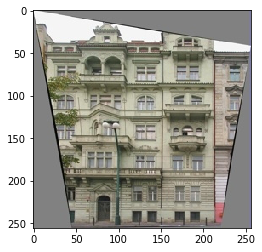

In [35]:
plt.imshow(x)
plt.show()

In [29]:
import torch

In [33]:
y = torch.tensor(x).permute(2,0,1).unsqueeze(0)
y.shape

torch.Size([1, 3, 256, 256])

In [34]:
0.9999999+0.000000001

0.999999901

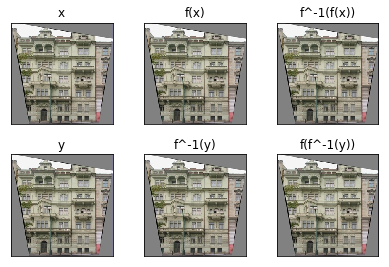

In [41]:
    import matplotlib.pyplot as plt
    fig,((ax11,ax12,ax13),(ax21,ax22,ax23)) = plt.subplots(2,3,sharex=True,sharey=True)
    
    ax11.imshow(   x)
    ax12.imshow(   x)
    ax13.imshow(x)
    ax11.set_title('x')
    ax12.set_title('f(x)')
    ax13.set_title('f^-1(f(x))')
    
    ax21.imshow(x)
    ax22.imshow(x)
    ax23.imshow(x)
    ax21.set_title('y')
    ax22.set_title('f^-1(y)')
    ax23.set_title('f(f^-1(y))')
    
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [52]:
im_tensor = transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))(transforms.ToTensor()(im))
print(im_tensor.max())
print(im_tensor.min())

tensor(1.)
tensor(-1.)


# image jittering

In [12]:
from PIL import Image
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.distributions import transforms

In [59]:
im_A = Image.open('datasets/horse2zebra/train/A/n02381460_1001.jpg')
im_B = Image.open('datasets/horse2zebra/train/B/n02391049_10007.jpg')

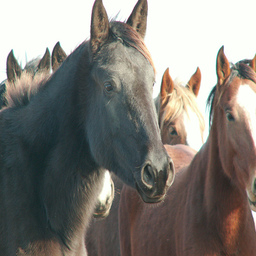

In [60]:
im_A

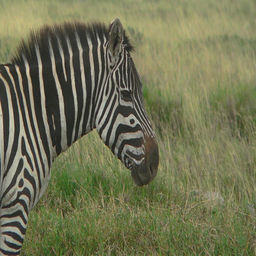

In [61]:
im_B

In [62]:
im_raw = np.array(im_A)
im_raw

array([[[253, 255, 250],
        [253, 255, 250],
        [253, 255, 250],
        ...,
        [253, 255, 250],
        [253, 255, 250],
        [253, 255, 250]],

       [[253, 255, 250],
        [253, 255, 250],
        [253, 255, 250],
        ...,
        [253, 255, 250],
        [253, 255, 250],
        [253, 255, 250]],

       [[253, 255, 250],
        [253, 255, 250],
        [253, 255, 250],
        ...,
        [253, 255, 250],
        [253, 255, 250],
        [253, 255, 250]],

       ...,

       [[ 44,  53,  52],
        [ 46,  52,  52],
        [ 50,  56,  56],
        ...,
        [101,  67,  57],
        [105,  71,  61],
        [108,  75,  66]],

       [[ 44,  53,  50],
        [ 49,  55,  53],
        [ 47,  53,  51],
        ...,
        [102,  65,  56],
        [107,  70,  61],
        [108,  74,  64]],

       [[ 44,  53,  48],
        [ 45,  54,  49],
        [ 48,  54,  52],
        ...,
        [104,  66,  55],
        [109,  71,  60],
        [109,  72,  63]]

In [63]:
noise = np.random.uniform(size=im_raw.shape)
noise

array([[[0.40164462, 0.86012064, 0.38653488],
        [0.52621503, 0.11463169, 0.43042106],
        [0.44410908, 0.93074535, 0.14623692],
        ...,
        [0.17570866, 0.1143917 , 0.75456781],
        [0.76604314, 0.46465942, 0.58285765],
        [0.81754761, 0.66601766, 0.92281011]],

       [[0.35777947, 0.3664138 , 0.11555886],
        [0.16126432, 0.71261537, 0.31318584],
        [0.65483718, 0.46810233, 0.84217984],
        ...,
        [0.52047474, 0.57218885, 0.83766317],
        [0.21795577, 0.81821106, 0.76207742],
        [0.94240495, 0.90883271, 0.42899112]],

       [[0.69657584, 0.72794266, 0.22139675],
        [0.37013408, 0.68184379, 0.82386573],
        [0.54015475, 0.00116937, 0.37078343],
        ...,
        [0.32636532, 0.95941703, 0.23955224],
        [0.86757381, 0.22112839, 0.39340937],
        [0.63386751, 0.79566998, 0.59182477]],

       ...,

       [[0.49336641, 0.79503953, 0.08774489],
        [0.58015978, 0.21334876, 0.42470444],
        [0.83518194, 0

In [64]:
im_jittered = torch.tensor(im_raw + noise,dtype=torch.float64)
im_jittered

tensor([[[253.4016, 255.8601, 250.3865],
         [253.5262, 255.1146, 250.4304],
         [253.4441, 255.9307, 250.1462],
         ...,
         [253.1757, 255.1144, 250.7546],
         [253.7660, 255.4647, 250.5829],
         [253.8175, 255.6660, 250.9228]],

        [[253.3578, 255.3664, 250.1156],
         [253.1613, 255.7126, 250.3132],
         [253.6548, 255.4681, 250.8422],
         ...,
         [253.5205, 255.5722, 250.8377],
         [253.2180, 255.8182, 250.7621],
         [253.9424, 255.9088, 250.4290]],

        [[253.6966, 255.7279, 250.2214],
         [253.3701, 255.6818, 250.8239],
         [253.5402, 255.0012, 250.3708],
         ...,
         [253.3264, 255.9594, 250.2396],
         [253.8676, 255.2211, 250.3934],
         [253.6339, 255.7957, 250.5918]],

        ...,

        [[ 44.4934,  53.7950,  52.0877],
         [ 46.5802,  52.2133,  52.4247],
         [ 50.8352,  56.0029,  56.7332],
         ...,
         [101.9260,  67.6344,  57.9361],
         [105.2279,  7

In [65]:
sigmoid = transforms.SigmoidTransform()

In [66]:
alpha = 0.05

In [69]:
im_tensor = sigmoid.inv(alpha+(1-alpha)*im_jittered/256)

In [72]:
import matplotlib.pyplot as plt

(array([1.21147e+05, 2.83920e+04, 1.73710e+04, 2.07980e+04, 7.71700e+03,
        1.04300e+03, 1.15000e+02, 2.30000e+01, 1.00000e+00, 1.00000e+00]),
 array([-2.08538199, -0.05727457,  1.97083285,  3.99894027,  6.02704769,
         8.05515511, 10.08326253, 12.11136995, 14.13947737, 16.16758479,
        18.19569221]),
 <a list of 10 Patch objects>)

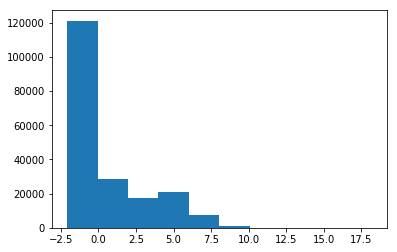

In [74]:
plt.hist(im_tensor.numpy().flatten())

In [82]:
def img2tensor(im,alpha=0.05):
    sigmoid = transforms.SigmoidTransform()
    im_array = np.array(im) #uint8 array of pixel intensities in {0,1,...,255}
    noise = np.random.uniform(size=im_raw.shape) #random noise in [0,1)
    im_jittered = torch.tensor(im_raw + noise,dtype=torch.float64) #jittered immages in [0,256)
    im_norm = alpha+(1-alpha)*im_jittered/256
    im_tensor = sigmoid.inv(im_norm) #convert to floats
    return im_tensor

In [90]:
def tensor2img(im_tensor,alpha=0.05):
    sigmoid = transforms.SigmoidTransform()
    im_norm = sigmoid(im_tensor)
    im_array = (255*im_norm.cpu().numpy()).astype(np.uint8)
    return im_array

In [91]:
img2tensor(im_A)

tensor([[[ 4.7748,  6.3378,  3.9583],
         [ 4.6065,  6.7354,  3.8906],
         [ 4.5102,  5.8158,  3.9465],
         ...,
         [ 4.8871,  6.8851,  3.8378],
         [ 4.8313,  6.5134,  3.8521],
         [ 4.7091,  6.3014,  3.7840]],

        [[ 4.7264,  7.2138,  3.9057],
         [ 4.8630,  7.4988,  3.8738],
         [ 4.7903,  7.1599,  3.8818],
         ...,
         [ 4.6389,  6.4311,  3.7864],
         [ 4.8387,  7.5845,  3.8195],
         [ 4.7081,  6.8078,  3.8644]],

        [[ 4.8000,  6.4263,  3.9020],
         [ 4.6939,  5.6786,  3.9589],
         [ 4.6264,  6.0128,  3.9331],
         ...,
         [ 4.4946,  6.3238,  3.8225],
         [ 4.8141,  5.8607,  3.8079],
         [ 4.5311,  6.6080,  3.8663]],

        ...,

        [[-1.3048, -1.1128, -1.1283],
         [-1.2586, -1.1200, -1.1272],
         [-1.1716, -1.0476, -1.0459],
         ...,
         [-0.2953, -0.8431, -1.0316],
         [-0.2417, -0.7681, -0.9456],
         [-0.1966, -0.7025, -0.8605]],

        [[

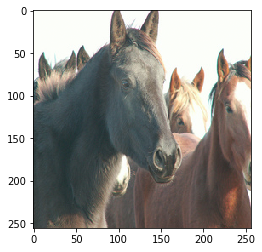

In [94]:
plt.imshow(tensor2img(img2tensor(im_A)))

# image jittering clean

In [2]:
from PIL import Image
import numpy as np
import torch
from torch.distributions import transforms
import matplotlib.pyplot as plt

In [3]:
def img2tensor(im,alpha=0.05,permute=True,batch_dim=True):
    """
    Input: Pillow generated image
    Output: Tensor representation 
    """
    sigmoid = transforms.SigmoidTransform()                          #initialize transformer
    im_array = np.array(im)                                          #uint8 array of pixel intensities in {0,1,...,255}
    noise    = np.random.uniform(size=im_array.shape)                #random noise in [0,1)
    im_jittered = torch.tensor(im_array + noise,dtype=torch.float64) #jittered immages in [0,256)
    im_norm = alpha+(1-alpha)*im_jittered/256                        #normalized image in (0,1)
    im_tensor = sigmoid.inv(im_norm)                                 #convert to unbounded numbers for modelling
    if permute:
        im_tensor = im_tensor.permute(2,0,1)                         #bring channel dim to front
    if batch_dim:
        im_tensor = im_tensor.unsqueeze(0)                           #add batch dim
    return im_tensor

In [4]:
def tensor2img(im_tensor,alpha=0.05,was_permuted=True,has_batch_dim=True):
    """
    Input: Tensor representation of image
    Output: Image as uint8 numpy array
    """
    sigmoid = transforms.SigmoidTransform()                 #initialize transformer
    if has_batch_dim:
        im_tensor = im_tensor.squeeze(0)                    #remove batch dim
    if was_permuted:
        im_tensor = im_tensor.permute(1,2,0)                #bring batch dim to back
    im_norm = sigmoid(im_tensor)
    im_jittered = 256*(im_norm - alpha)/(1-alpha)
    im_array = (im_jittered.cpu().numpy()).astype(np.uint8)
    return im_array

In [5]:
im_A = Image.open('datasets/horse2zebra/train/A/n02381460_1001.jpg')
im_B = Image.open('datasets/horse2zebra/train/B/n02391049_10007.jpg')

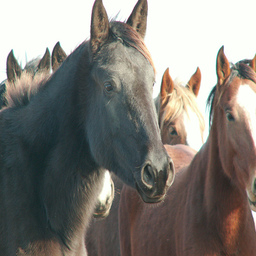

In [6]:
im_A

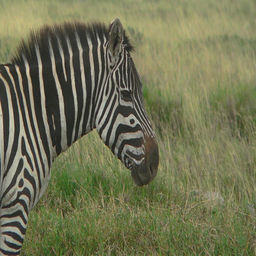

In [7]:
im_B

In [8]:
tensor_A = img2tensor(im_A)
print(tensor_A.shape)
print(tensor_A.min())
print(tensor_A.max())

torch.Size([1, 3, 256, 256])
tensor(-2.0633, dtype=torch.float64)
tensor(16.1757, dtype=torch.float64)


In [9]:
im_A_rec = tensor2img(tensor_A)
print(im_A_rec.shape)
print(im_A_rec.min())
print(im_A_rec.max())

(256, 256, 3)
16
255


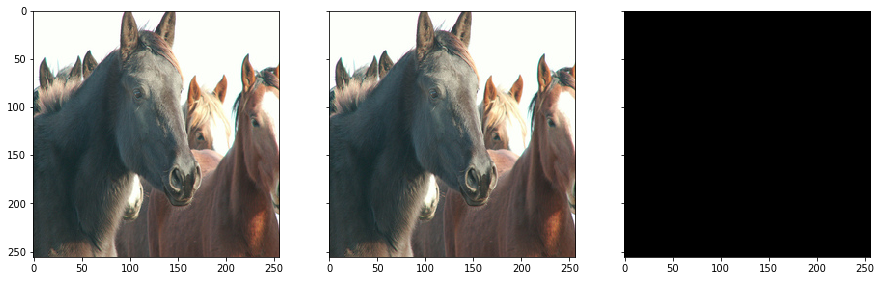

In [10]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5),sharex=True,sharey=True)
ax1.imshow(np.array(im_A))
ax2.imshow(im_A_rec)
ax3.imshow(im_A_rec - np.array(im_A))
plt.show()

# iRevNet

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.distributions import transforms

In [10]:
def img2tensor(im,alpha=0.05,permute=True,batch_dim=True):
    """
    Input: Pillow generated image
    Output: Tensor representation 
    """
    sigmoid = transforms.SigmoidTransform()                          #initialize transformer
    im_array = np.array(im)                                          #uint8 array of pixel intensities in {0,1,...,255}
    noise    = np.random.uniform(size=im_array.shape)                #random noise in [0,1)
    im_jittered = torch.tensor(im_array + noise,dtype=torch.float32) #jittered immages in [0,256)
    im_norm = alpha+(1-alpha)*im_jittered/256                        #normalized image in (0,1)
    im_tensor = sigmoid.inv(im_norm)                                 #convert to unbounded numbers for modelling
    if permute:
        im_tensor = im_tensor.permute(2,0,1)                         #bring channel dim to front
    if batch_dim:
        im_tensor = im_tensor.unsqueeze(0)                           #add batch dim
    return im_tensor

In [11]:
def tensor2img(im_tensor,alpha=0.05,was_permuted=True,has_batch_dim=True):
    """
    Input: Tensor representation of image
    Output: Image as uint8 numpy array
    """
    sigmoid = transforms.SigmoidTransform()                 #initialize transformer
    if has_batch_dim:
        im_tensor = im_tensor.squeeze(0)                    #remove batch dim
    if was_permuted:
        im_tensor = im_tensor.permute(1,2,0)                #bring batch dim to back
    im_norm = sigmoid(im_tensor)
    im_jittered = 256*(im_norm - alpha)/(1-alpha)
    im_array = (im_jittered.detach().cpu().numpy()).astype(np.uint8)
    return im_array

In [12]:
im_A = Image.open('datasets/horse2zebra/train/A/n02381460_1001.jpg')
im_B = Image.open('datasets/horse2zebra/train/B/n02391049_10007.jpg')

In [13]:
input_A = img2tensor(im_A)
input_B = img2tensor(im_B)

In [6]:
input_A.shape

torch.Size([1, 3, 256, 256])

In [114]:
from iRevNet import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [141]:
#model = iRevNetCycle([3,256,256])

if True:
    model = iRevNet(nBlocks=[6, 16, 72, 6], nStrides=[2,2,2,2],
                    nChannels=[24,96,384,1536], nClasses=1000, init_ds=2,
                    dropout_rate=0., affineBN=True, in_shape=[3, 256, 256],
                    mult=4)

if False:
    model = iRevNet(nBlocks=[1], nStrides=[2],
                    nChannels=[24], nClasses=1000, init_ds=2,
                    dropout_rate=0., affineBN=True, in_shape=[3, 256, 256],
                    mult=4)


 == Building iRevNet 301 == 


In [144]:
forward_A = model.forward(input_A)

torch.Size([1, 3072, 8, 8])


In [119]:
_ = tensor2img(forward_A)
_.shape

(64, 64, 48)

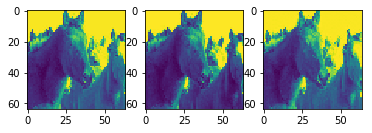

In [122]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3)
ax1.imshow(_[:,:,0])
ax2.imshow(_[:,:,1])
ax3.imshow(_[:,:,30])

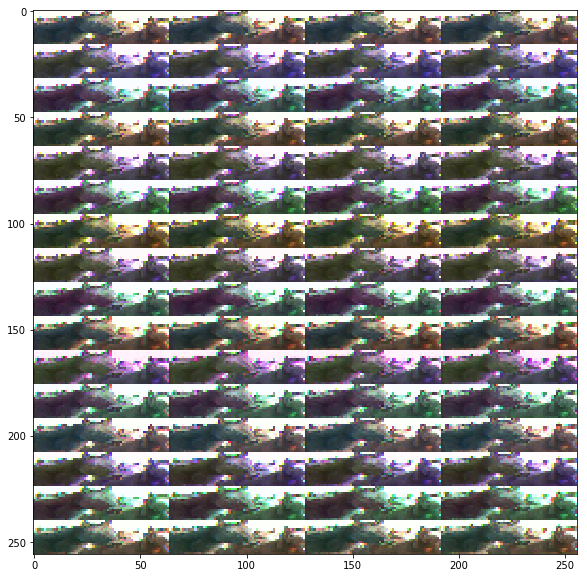

In [133]:
_resh = np.moveaxis(np.moveaxis(_,-1,0).reshape((3,256,256)),0,-1)
fig,(ax1) = plt.subplots(figsize=(10,10))
ax1.imshow(_resh)


In [134]:
from model_utils import psi

In [135]:
t = psi(2)

In [139]:
t.inverse(t.inverse(forward_A)).shape

torch.Size([1, 3, 256, 256])

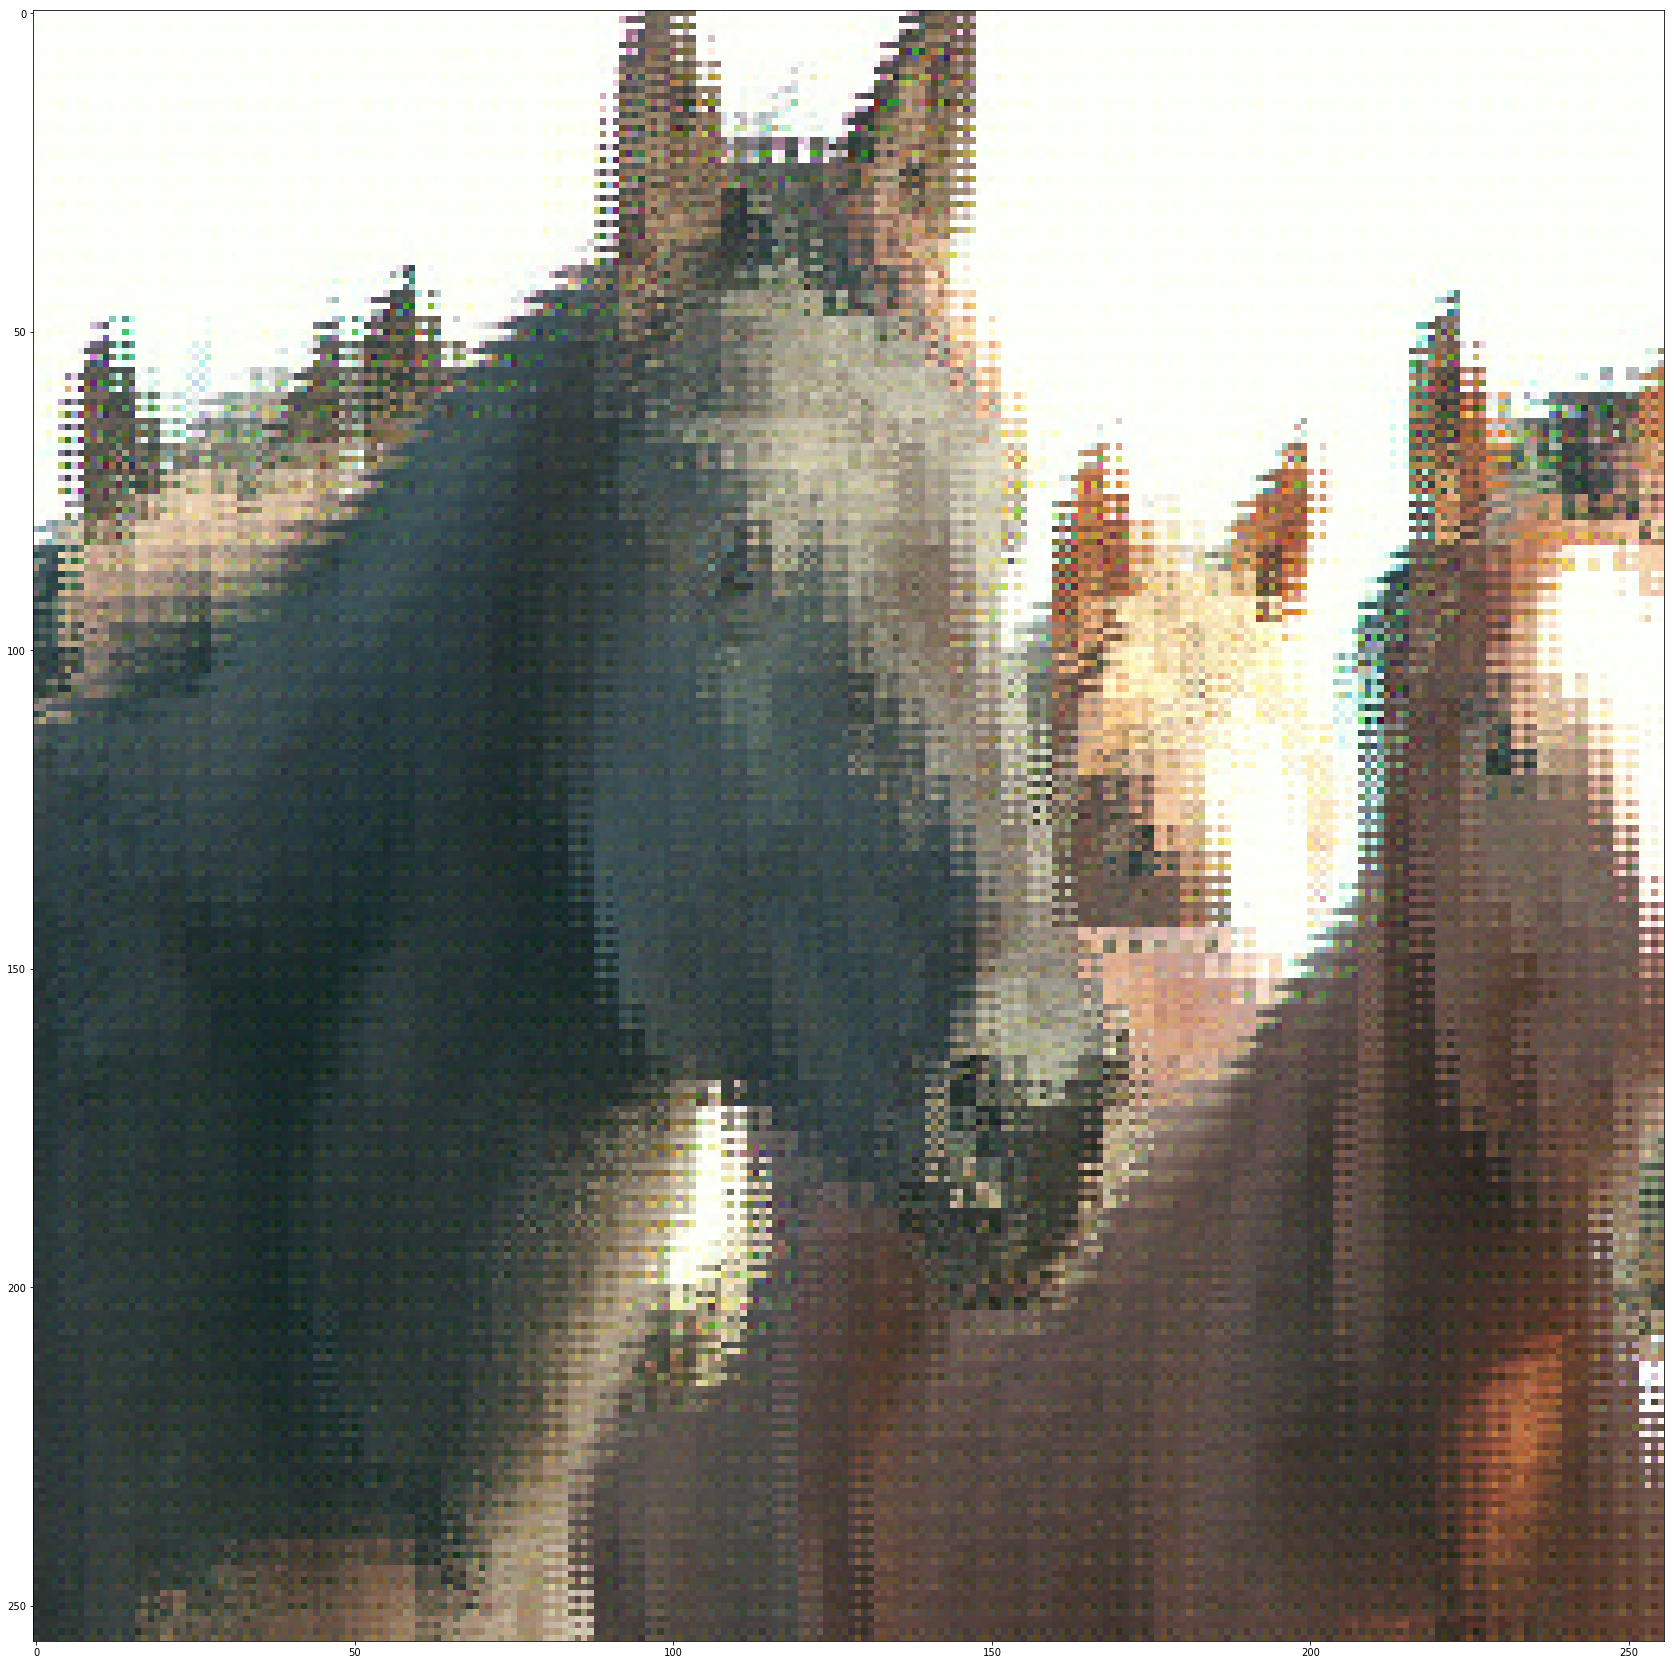

In [140]:
plt.subplots(figsize=(30,30))
_ = tensor2img(t.inverse(t.inverse(forward_A)))
plt.imshow(_)
plt.show()

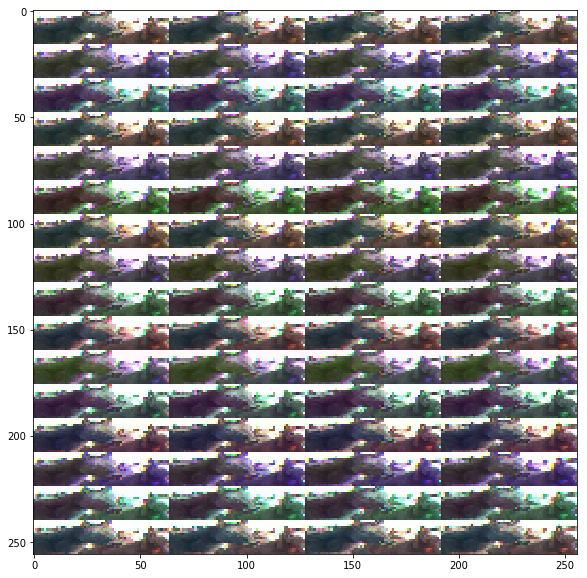

In [87]:
plt.subplots(figsize=(10,10))
plt.imshow(tensor2img(forward_A))
plt.show()

In [36]:
256/8


32.0

In [82]:
input_dummy = torch.ones((1,3,256,256))

In [83]:
forward_dummy = model.forward(input_dummy)

torch.Size([1, 48, 64, 64])


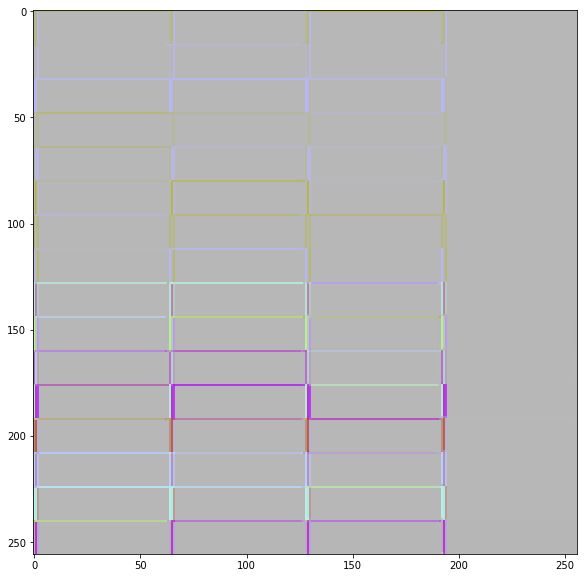

In [90]:
plt.subplots(figsize=(10,10))
plt.imshow(tensor2img(forward_dummy))
plt.savefig('cheese.png')
plt.show()

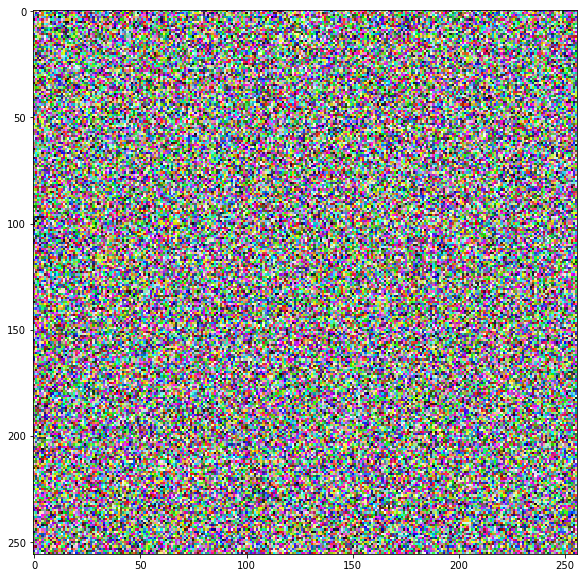

In [155]:
plt.subplots(figsize=(10,10))
plt.imshow(tensor2img(torch.randn((1,3,256,256))*2))
plt.show()

In [151]:
_ = forward_A
for i in range(5):
    _ = t.inverse(_)
tensor2img(_).shape

(256, 256, 3)

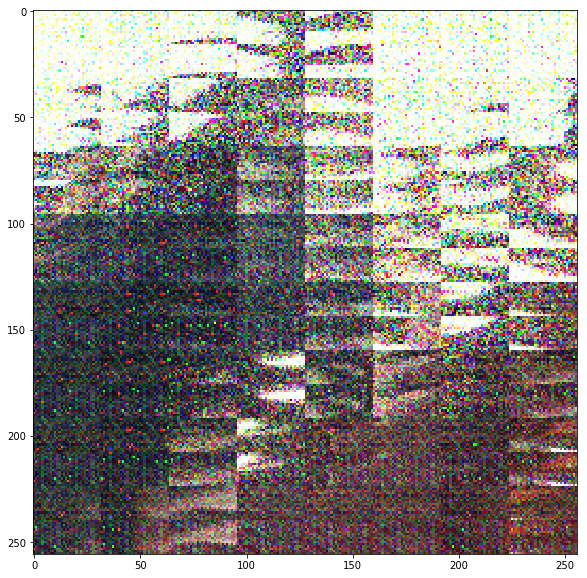

In [152]:
plt.subplots(figsize=(10,10))
plt.imshow(tensor2img(_))
plt.show()

# title